In [10]:
import matplotlib.pyplot as plt
import numpy as np
#tosave result of losses
a=[]
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


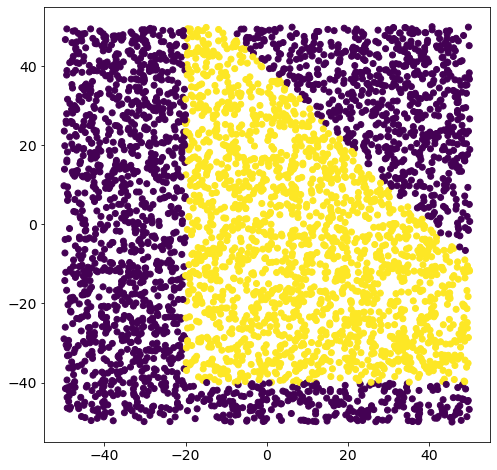

In [11]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

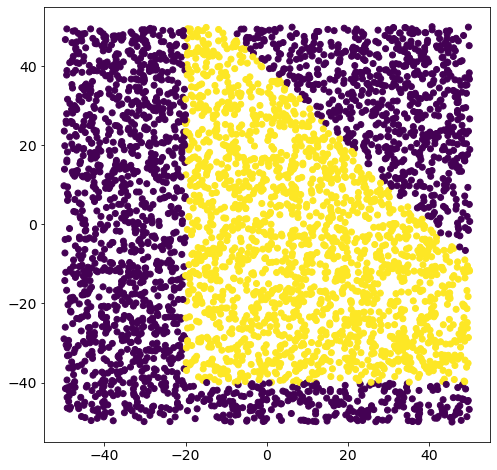

In [13]:
#keras work with numpy arrays: just use them from the start
TYPE=1
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [14]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [15]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    #return x/50
    return ((x-x.min())/(x.max()-x.min()))

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-0.31683209 -0.29618785]
 [ 0.0670257   0.09484911]
 [ 0.4638685   0.15248925]
 ...
 [-0.49327804 -0.16730781]
 [ 0.13038794 -0.16990362]
 [ 0.44988656  0.27292801]]


In [16]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 25)                75        
                                                                 
 dense_10 (Dense)            (None, 25)                650       
                                                                 
 dense_11 (Dense)            (None, 25)                650       
                                                                 
 dense_12 (Dense)            (None, 25)                650       
                                                                 
 dense_13 (Dense)            (None, 25)                650       
                                                                 
 dense_14 (Dense)            (None, 25)               

In [17]:
model.compile(loss='binary_crossentropy',
               optimizer="RMSprop",
               #optimizer='adam',
               metrics=['accuracy'])

In [18]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
36/36 - 1s - loss: 0.6373 - accuracy: 0.6509 - val_loss: 0.6247 - val_accuracy: 0.6288 - 1s/epoch - 34ms/step
Epoch 2/500
36/36 - 0s - loss: 0.6071 - accuracy: 0.6737 - val_loss: 0.6135 - val_accuracy: 0.6225 - 107ms/epoch - 3ms/step
Epoch 3/500
36/36 - 0s - loss: 0.5702 - accuracy: 0.6938 - val_loss: 0.5485 - val_accuracy: 0.6787 - 110ms/epoch - 3ms/step
Epoch 4/500
36/36 - 0s - loss: 0.4874 - accuracy: 0.7575 - val_loss: 0.4334 - val_accuracy: 0.7837 - 107ms/epoch - 3ms/step
Epoch 5/500
36/36 - 0s - loss: 0.3856 - accuracy: 0.8288 - val_loss: 0.3378 - val_accuracy: 0.8788 - 108ms/epoch - 3ms/step
Epoch 6/500
36/36 - 0s - loss: 0.3125 - accuracy: 0.8734 - val_loss: 0.2854 - val_accuracy: 0.8850 - 106ms/epoch - 3ms/step
Epoch 7/500
36/36 - 0s - loss: 0.2733 - accuracy: 0.8838 - val_loss: 0.2603 - val_accuracy: 0.8900 - 112ms/epoch - 3ms/step
Epoch 8/500
36/36 - 0s - loss: 0.2637 - accuracy: 0.8809 - val_loss: 0.2320 - val_accuracy: 0.8938 - 108ms/epoch - 3ms/step
Epoch 9/50

Epoch 67/500
36/36 - 0s - loss: 0.0634 - accuracy: 0.9747 - val_loss: 0.0528 - val_accuracy: 0.9737 - 110ms/epoch - 3ms/step
Epoch 68/500
36/36 - 0s - loss: 0.0653 - accuracy: 0.9700 - val_loss: 0.0960 - val_accuracy: 0.9675 - 101ms/epoch - 3ms/step
Epoch 69/500
36/36 - 0s - loss: 0.0655 - accuracy: 0.9719 - val_loss: 0.0428 - val_accuracy: 0.9800 - 107ms/epoch - 3ms/step
Epoch 70/500
36/36 - 0s - loss: 0.0625 - accuracy: 0.9719 - val_loss: 0.1114 - val_accuracy: 0.9588 - 105ms/epoch - 3ms/step
Epoch 71/500
36/36 - 0s - loss: 0.0718 - accuracy: 0.9709 - val_loss: 0.0450 - val_accuracy: 0.9762 - 105ms/epoch - 3ms/step
Epoch 72/500
36/36 - 0s - loss: 0.0677 - accuracy: 0.9712 - val_loss: 0.0464 - val_accuracy: 0.9762 - 105ms/epoch - 3ms/step
Epoch 73/500
36/36 - 0s - loss: 0.0660 - accuracy: 0.9725 - val_loss: 0.1069 - val_accuracy: 0.9588 - 107ms/epoch - 3ms/step
Epoch 74/500
36/36 - 0s - loss: 0.0673 - accuracy: 0.9706 - val_loss: 0.0724 - val_accuracy: 0.9650 - 109ms/epoch - 3ms/step


Epoch 133/500
36/36 - 0s - loss: 0.0452 - accuracy: 0.9772 - val_loss: 0.0404 - val_accuracy: 0.9800 - 106ms/epoch - 3ms/step
Epoch 134/500
36/36 - 0s - loss: 0.0537 - accuracy: 0.9769 - val_loss: 0.0350 - val_accuracy: 0.9825 - 107ms/epoch - 3ms/step
Epoch 135/500
36/36 - 0s - loss: 0.0489 - accuracy: 0.9781 - val_loss: 0.0486 - val_accuracy: 0.9837 - 103ms/epoch - 3ms/step
Epoch 136/500
36/36 - 0s - loss: 0.0541 - accuracy: 0.9756 - val_loss: 0.0316 - val_accuracy: 0.9862 - 107ms/epoch - 3ms/step
Epoch 137/500
36/36 - 0s - loss: 0.0457 - accuracy: 0.9800 - val_loss: 0.0581 - val_accuracy: 0.9712 - 107ms/epoch - 3ms/step
Epoch 138/500
36/36 - 0s - loss: 0.0504 - accuracy: 0.9781 - val_loss: 0.0599 - val_accuracy: 0.9737 - 106ms/epoch - 3ms/step
Epoch 139/500
36/36 - 0s - loss: 0.0483 - accuracy: 0.9803 - val_loss: 0.0333 - val_accuracy: 0.9887 - 104ms/epoch - 3ms/step
Epoch 140/500
36/36 - 0s - loss: 0.0529 - accuracy: 0.9794 - val_loss: 0.0415 - val_accuracy: 0.9812 - 105ms/epoch - 3

36/36 - 0s - loss: 0.0484 - accuracy: 0.9812 - val_loss: 0.0426 - val_accuracy: 0.9850 - 109ms/epoch - 3ms/step
Epoch 199/500
36/36 - 0s - loss: 0.0444 - accuracy: 0.9812 - val_loss: 0.0564 - val_accuracy: 0.9700 - 105ms/epoch - 3ms/step
Epoch 200/500
36/36 - 0s - loss: 0.0425 - accuracy: 0.9812 - val_loss: 0.1249 - val_accuracy: 0.9575 - 107ms/epoch - 3ms/step
Epoch 201/500
36/36 - 0s - loss: 0.0509 - accuracy: 0.9784 - val_loss: 0.0239 - val_accuracy: 0.9925 - 109ms/epoch - 3ms/step
Epoch 202/500
36/36 - 0s - loss: 0.0452 - accuracy: 0.9809 - val_loss: 0.0337 - val_accuracy: 0.9825 - 105ms/epoch - 3ms/step
Epoch 203/500
36/36 - 0s - loss: 0.0474 - accuracy: 0.9800 - val_loss: 0.0525 - val_accuracy: 0.9725 - 108ms/epoch - 3ms/step
Epoch 204/500
36/36 - 0s - loss: 0.0444 - accuracy: 0.9778 - val_loss: 0.1795 - val_accuracy: 0.9450 - 108ms/epoch - 3ms/step
Epoch 205/500
36/36 - 0s - loss: 0.0439 - accuracy: 0.9797 - val_loss: 0.0239 - val_accuracy: 0.9887 - 99ms/epoch - 3ms/step
Epoch 2

Epoch 264/500
36/36 - 0s - loss: 0.0447 - accuracy: 0.9837 - val_loss: 0.0210 - val_accuracy: 0.9925 - 108ms/epoch - 3ms/step
Epoch 265/500
36/36 - 0s - loss: 0.0443 - accuracy: 0.9819 - val_loss: 0.0240 - val_accuracy: 0.9900 - 104ms/epoch - 3ms/step
Epoch 266/500
36/36 - 0s - loss: 0.0449 - accuracy: 0.9819 - val_loss: 0.0277 - val_accuracy: 0.9875 - 109ms/epoch - 3ms/step
Epoch 267/500
36/36 - 0s - loss: 0.0394 - accuracy: 0.9841 - val_loss: 0.0357 - val_accuracy: 0.9875 - 102ms/epoch - 3ms/step
Epoch 268/500
36/36 - 0s - loss: 0.0446 - accuracy: 0.9778 - val_loss: 0.0335 - val_accuracy: 0.9837 - 107ms/epoch - 3ms/step
Epoch 269/500
36/36 - 0s - loss: 0.0382 - accuracy: 0.9822 - val_loss: 0.0259 - val_accuracy: 0.9900 - 104ms/epoch - 3ms/step
Epoch 270/500
36/36 - 0s - loss: 0.0450 - accuracy: 0.9800 - val_loss: 0.0166 - val_accuracy: 0.9962 - 109ms/epoch - 3ms/step
Epoch 271/500
36/36 - 0s - loss: 0.0388 - accuracy: 0.9819 - val_loss: 0.0320 - val_accuracy: 0.9862 - 108ms/epoch - 3

36/36 - 0s - loss: 0.0346 - accuracy: 0.9834 - val_loss: 0.0266 - val_accuracy: 0.9887 - 109ms/epoch - 3ms/step
Epoch 330/500
36/36 - 0s - loss: 0.0418 - accuracy: 0.9822 - val_loss: 0.0795 - val_accuracy: 0.9675 - 102ms/epoch - 3ms/step
Epoch 331/500
36/36 - 0s - loss: 0.0386 - accuracy: 0.9834 - val_loss: 0.0176 - val_accuracy: 0.9937 - 101ms/epoch - 3ms/step
Epoch 332/500
36/36 - 0s - loss: 0.0334 - accuracy: 0.9869 - val_loss: 0.0214 - val_accuracy: 0.9912 - 102ms/epoch - 3ms/step
Epoch 333/500
36/36 - 0s - loss: 0.0432 - accuracy: 0.9797 - val_loss: 0.0293 - val_accuracy: 0.9862 - 112ms/epoch - 3ms/step
Epoch 334/500
36/36 - 0s - loss: 0.0402 - accuracy: 0.9831 - val_loss: 0.0292 - val_accuracy: 0.9850 - 111ms/epoch - 3ms/step
Epoch 335/500
36/36 - 0s - loss: 0.0379 - accuracy: 0.9816 - val_loss: 0.0292 - val_accuracy: 0.9850 - 111ms/epoch - 3ms/step
Epoch 336/500
36/36 - 0s - loss: 0.0378 - accuracy: 0.9847 - val_loss: 0.1551 - val_accuracy: 0.9475 - 110ms/epoch - 3ms/step
Epoch 

Epoch 395/500
36/36 - 0s - loss: 0.0391 - accuracy: 0.9837 - val_loss: 0.0638 - val_accuracy: 0.9762 - 111ms/epoch - 3ms/step
Epoch 396/500
36/36 - 0s - loss: 0.0337 - accuracy: 0.9866 - val_loss: 0.0567 - val_accuracy: 0.9750 - 112ms/epoch - 3ms/step
Epoch 397/500
36/36 - 0s - loss: 0.0399 - accuracy: 0.9853 - val_loss: 0.0152 - val_accuracy: 0.9962 - 110ms/epoch - 3ms/step
Epoch 398/500
36/36 - 0s - loss: 0.0372 - accuracy: 0.9831 - val_loss: 0.0370 - val_accuracy: 0.9825 - 110ms/epoch - 3ms/step
Epoch 399/500
36/36 - 0s - loss: 0.0353 - accuracy: 0.9844 - val_loss: 0.0222 - val_accuracy: 0.9937 - 102ms/epoch - 3ms/step
Epoch 400/500
36/36 - 0s - loss: 0.0389 - accuracy: 0.9844 - val_loss: 0.0230 - val_accuracy: 0.9887 - 103ms/epoch - 3ms/step
Epoch 401/500
36/36 - 0s - loss: 0.0323 - accuracy: 0.9875 - val_loss: 0.0846 - val_accuracy: 0.9712 - 109ms/epoch - 3ms/step
Epoch 402/500
36/36 - 0s - loss: 0.0389 - accuracy: 0.9834 - val_loss: 0.0147 - val_accuracy: 0.9950 - 104ms/epoch - 3

36/36 - 0s - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0365 - val_accuracy: 0.9862 - 103ms/epoch - 3ms/step
Epoch 461/500
36/36 - 0s - loss: 0.0366 - accuracy: 0.9844 - val_loss: 0.0419 - val_accuracy: 0.9812 - 109ms/epoch - 3ms/step
Epoch 462/500
36/36 - 0s - loss: 0.0346 - accuracy: 0.9856 - val_loss: 0.0518 - val_accuracy: 0.9875 - 109ms/epoch - 3ms/step
Epoch 463/500
36/36 - 0s - loss: 0.0308 - accuracy: 0.9875 - val_loss: 0.0558 - val_accuracy: 0.9787 - 99ms/epoch - 3ms/step
Epoch 464/500
36/36 - 0s - loss: 0.0345 - accuracy: 0.9853 - val_loss: 0.0163 - val_accuracy: 0.9937 - 105ms/epoch - 3ms/step
Epoch 465/500
36/36 - 0s - loss: 0.0330 - accuracy: 0.9856 - val_loss: 0.0336 - val_accuracy: 0.9875 - 112ms/epoch - 3ms/step
Epoch 466/500
36/36 - 0s - loss: 0.0333 - accuracy: 0.9856 - val_loss: 0.0885 - val_accuracy: 0.9762 - 108ms/epoch - 3ms/step
Epoch 467/500
36/36 - 0s - loss: 0.0302 - accuracy: 0.9872 - val_loss: 0.0728 - val_accuracy: 0.9737 - 103ms/epoch - 3ms/step
Epoch 4

[0.03260995075106621, 0.038484178483486176]


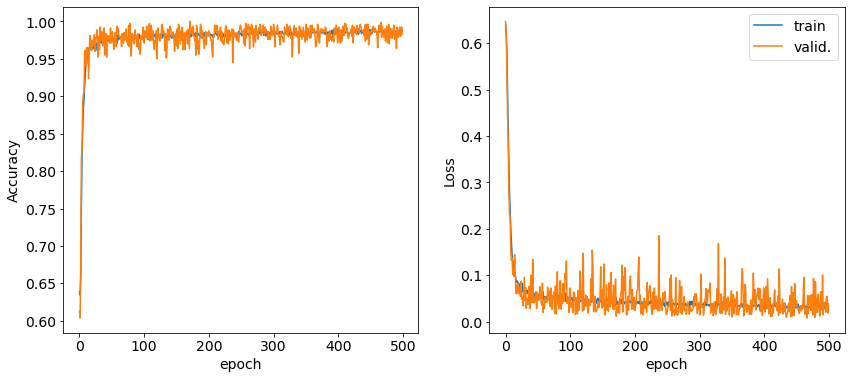

In [41]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC-1F-R-3.png')

In [42]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

#grid_r = grid/(50/x_train[:,1].max())
#grid_r = grid/50
grid_r = (grid-grid.min())/((grid.max())-(grid.min()))
print(grid_r)
pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-0.5  -0.5 ]
 [-0.48 -0.5 ]
 [-0.46 -0.5 ]
 ...
 [ 0.46  0.5 ]
 [ 0.48  0.5 ]
 [ 0.5   0.5 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

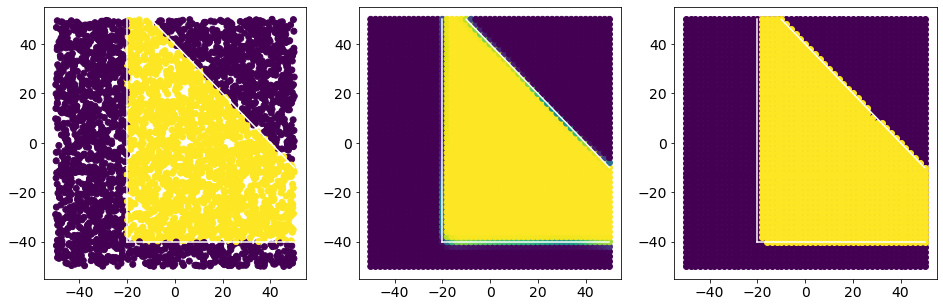

In [43]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('1F-R-3.png')